In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
matches_data = pd.read_csv('./matches.csv')

In [24]:
matches_data = matches_data.drop(columns=['MatchId'])

In [25]:
matches_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Frame_Minute,323248.0,14.178362,8.651989,1.0,7.00,13.0,20.0,51.0
Blue_Turret_Down,323248.0,1.436046,2.196520,0.0,0.00,0.0,2.0,11.0
Red_Turret_Down,323248.0,1.491947,2.242804,0.0,0.00,0.0,2.0,11.0
Blue_Gold,323248.0,26706.295470,17879.307368,2500.0,11385.75,24279.0,39339.0,110819.0
Red_Gold,323248.0,26686.343619,17881.077969,2500.0,11390.00,24207.5,39310.0,115755.0
Blue_Level,323248.0,41.607184,20.159559,5.0,26.00,43.0,57.0,90.0
Red_Level,323248.0,41.705616,20.249035,5.0,26.00,43.0,57.0,90.0
Blue_Damage,323248.0,32352.538667,30687.975025,0.0,8265.00,23500.0,47948.0,311453.0
Red_Damage,323248.0,32231.859684,30604.522334,0.0,8228.00,23424.5,47704.0,323420.0
Blue_Kills,323248.0,11.254647,9.921275,0.0,3.00,9.0,17.0,70.0


In [26]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323248 entries, 0 to 323247
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   Blue_Win          323248 non-null  bool 
 1   Frame_Minute      323248 non-null  int64
 2   Blue_Turret_Down  323248 non-null  int64
 3   Red_Turret_Down   323248 non-null  int64
 4   Blue_Gold         323248 non-null  int64
 5   Red_Gold          323248 non-null  int64
 6   Blue_Level        323248 non-null  int64
 7   Red_Level         323248 non-null  int64
 8   Blue_Damage       323248 non-null  int64
 9   Red_Damage        323248 non-null  int64
 10  Blue_Kills        323248 non-null  int64
 11  Red_Kills         323248 non-null  int64
 12  Blue_Drags        323248 non-null  int64
 13  Red_Drags         323248 non-null  int64
 14  Blue_Barons       323248 non-null  int64
 15  Red_Barons        323248 non-null  int64
 16  Blue_Inhibs       323248 non-null  int64
 17  Red_Inhibs

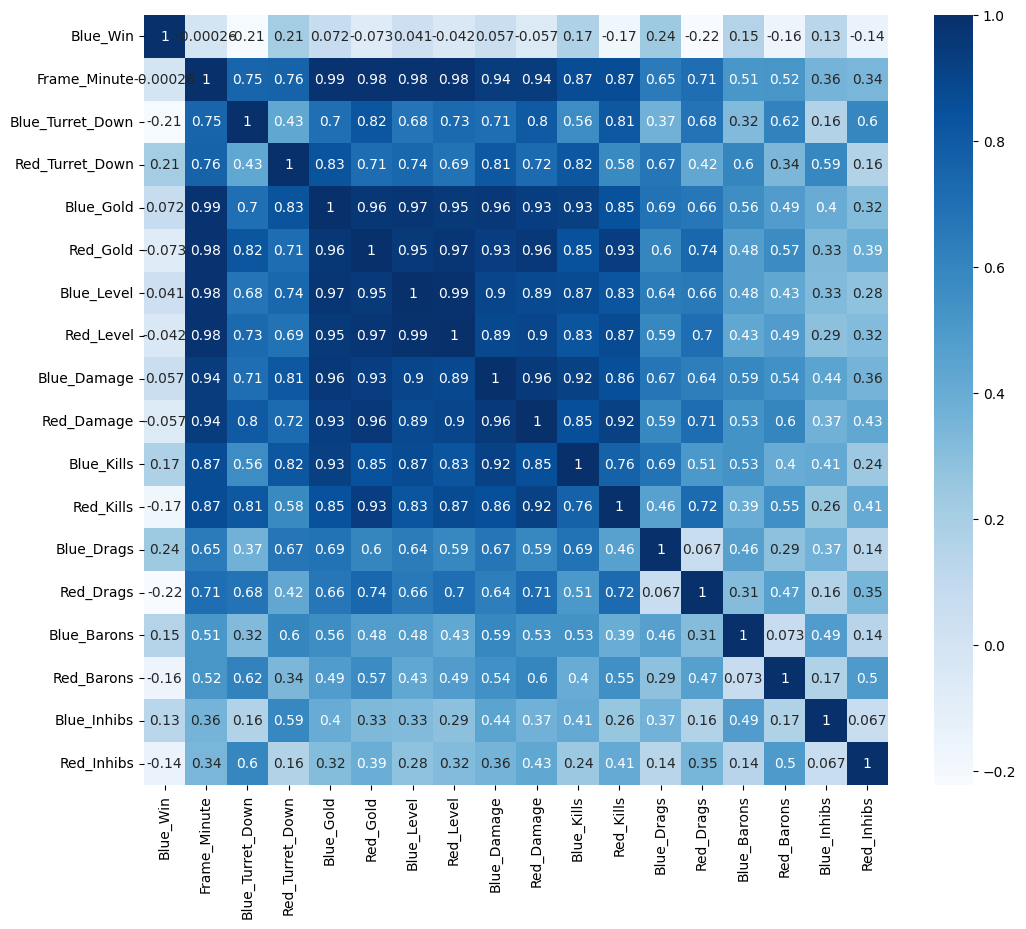

In [27]:
#Using Pearson Correlation of Relevant Features to Target
plt.figure(figsize=(12,10))
cor = matches_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [28]:
matches_data = matches_data.sample(frac=1, random_state=123)
X = matches_data.drop(columns=['Blue_Win'])
y = matches_data['Blue_Win']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 123)

In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

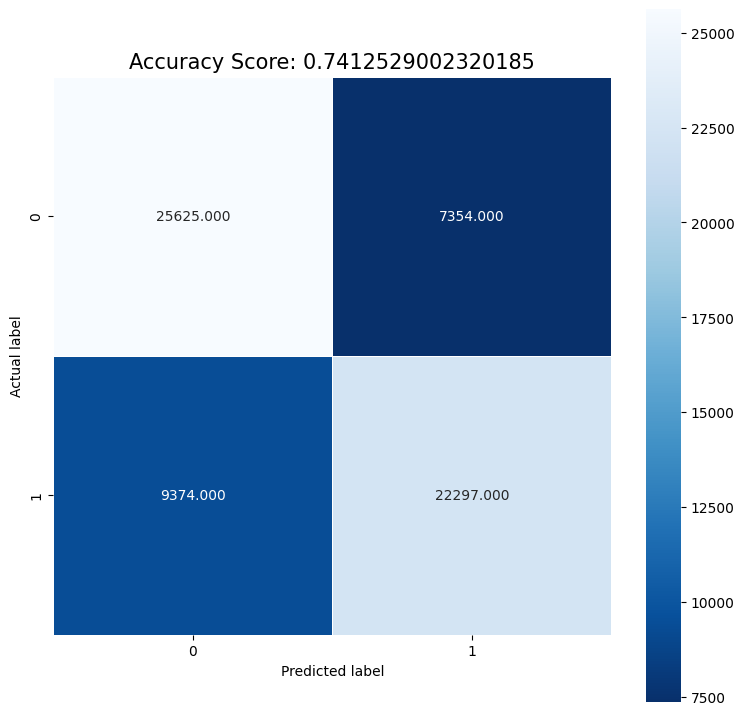

In [31]:
predictions = model.predict(X_test)
score = model.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [32]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=5, random_state=123)
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=5, random_state=123)

In [33]:
print(model.score(X_test, y_test))

0.7395204949729312


In [34]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [35]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [36]:
print(model.score(X_test, y_test))

0.7449187935034802
